<a href="https://colab.research.google.com/github/HaifaAziz1/IT326-Mushroom-Project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining Phase 3**



---
introduction goes here


# 1. **Classification**

### Loading data & defining splits

In this step, we began by importing the essential libraries for this phase.

We used pandas and numpy for data handling, matplotlib and seaborn for visualization, and scikit-learn for machine learning algorithms and evaluation metrics.


The dataset is loaded directly from our GitHub repository containing the preprocessed mushroom characteristics.
We separated the target variable ('class' - indicating edible or poisonous) from the feature set, then defined three different train-test splits:

*   60% train / 40% test
*   70% train / 30% test
*   80% train / 20% test


this step is essential to compare how data partitioning affects model performance.



In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# loading data
url = "https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/refs/heads/main/Dataset/Preprocessed_dataset.csv"
df = pd.read_csv(url)

# separating target from features
X = df.drop('class', axis=1)
y = df['class']

# define different split ratios
split_ratios = [0.4, 0.3, 0.2]
split_names = ['60/40', '70/30', '80/20']
results = []

## **a. Decision Tree (Gini index)**


### Model Training & Evaluation




We now implement our experimental design by training and evaluating Decision Tree models across the three predefined data splits:

For every split scenario, we:

* Partition the dataset into training and testing subsets
* Train a Decision Tree with consistent parameters (Gini criterion, max depth 3)

* Evaluate performance through accuracy scores and confusion matrices

* Visualize the resulting decision tree


Note: after experimenting with various tree depths, we selected max_depth = 3 as it provided the optimal balance between model performance (98% accuracy) and generalization capability, avoiding the overfitting observed in deeper trees that achieved 100% accuracy.


SPLIT: 60/40 (Test Size: 0.4)
Training set size: 4874
Test set size: 3250

=== DECISION TREE RESULTS ===
Test Accuracy: 98.15%
Confusion Matrix:
[[1665   18]
 [  42 1525]]


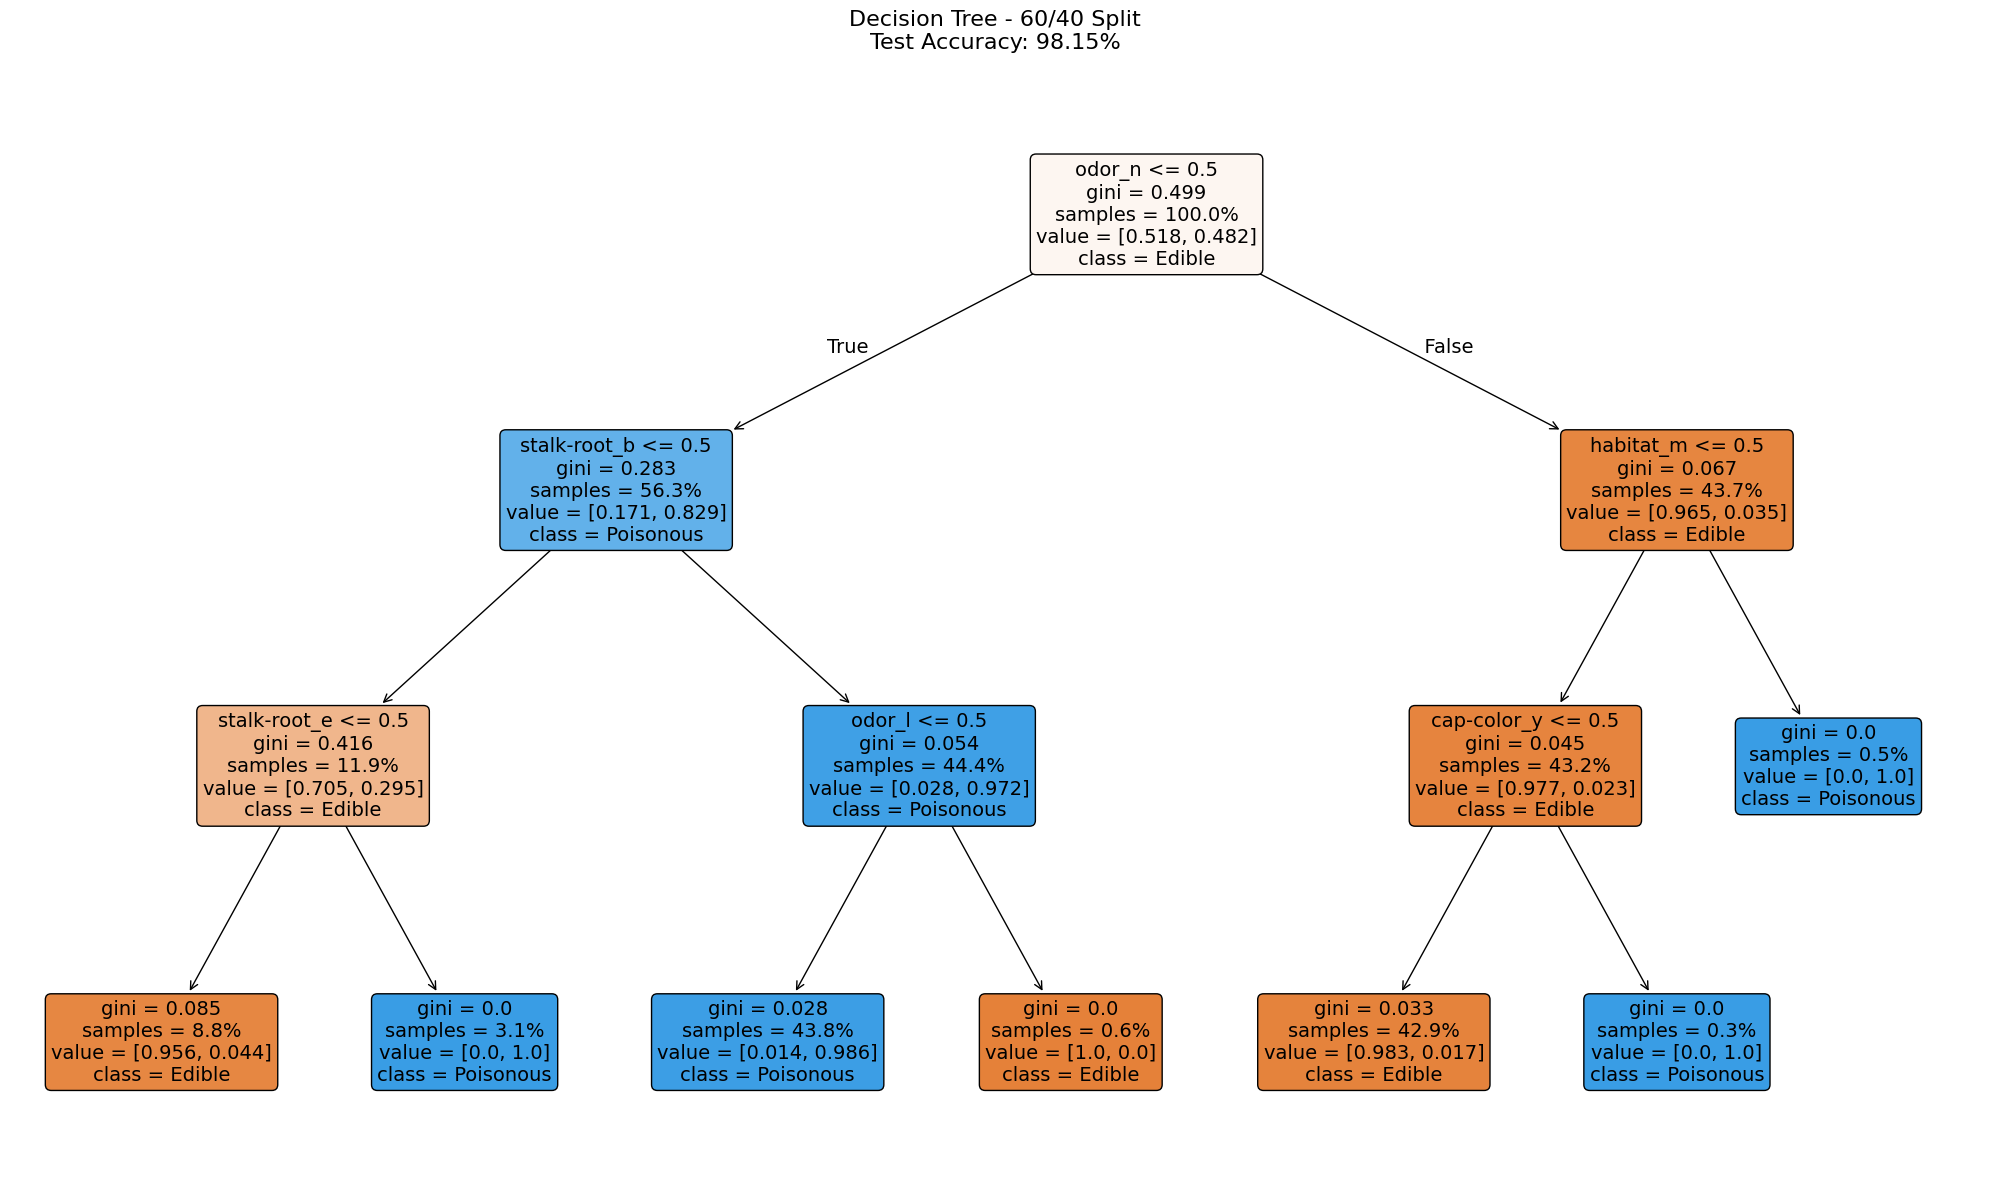


SPLIT: 70/30 (Test Size: 0.3)
Training set size: 5686
Test set size: 2438

=== DECISION TREE RESULTS ===
Test Accuracy: 98.07%
Confusion Matrix:
[[1248   15]
 [  32 1143]]


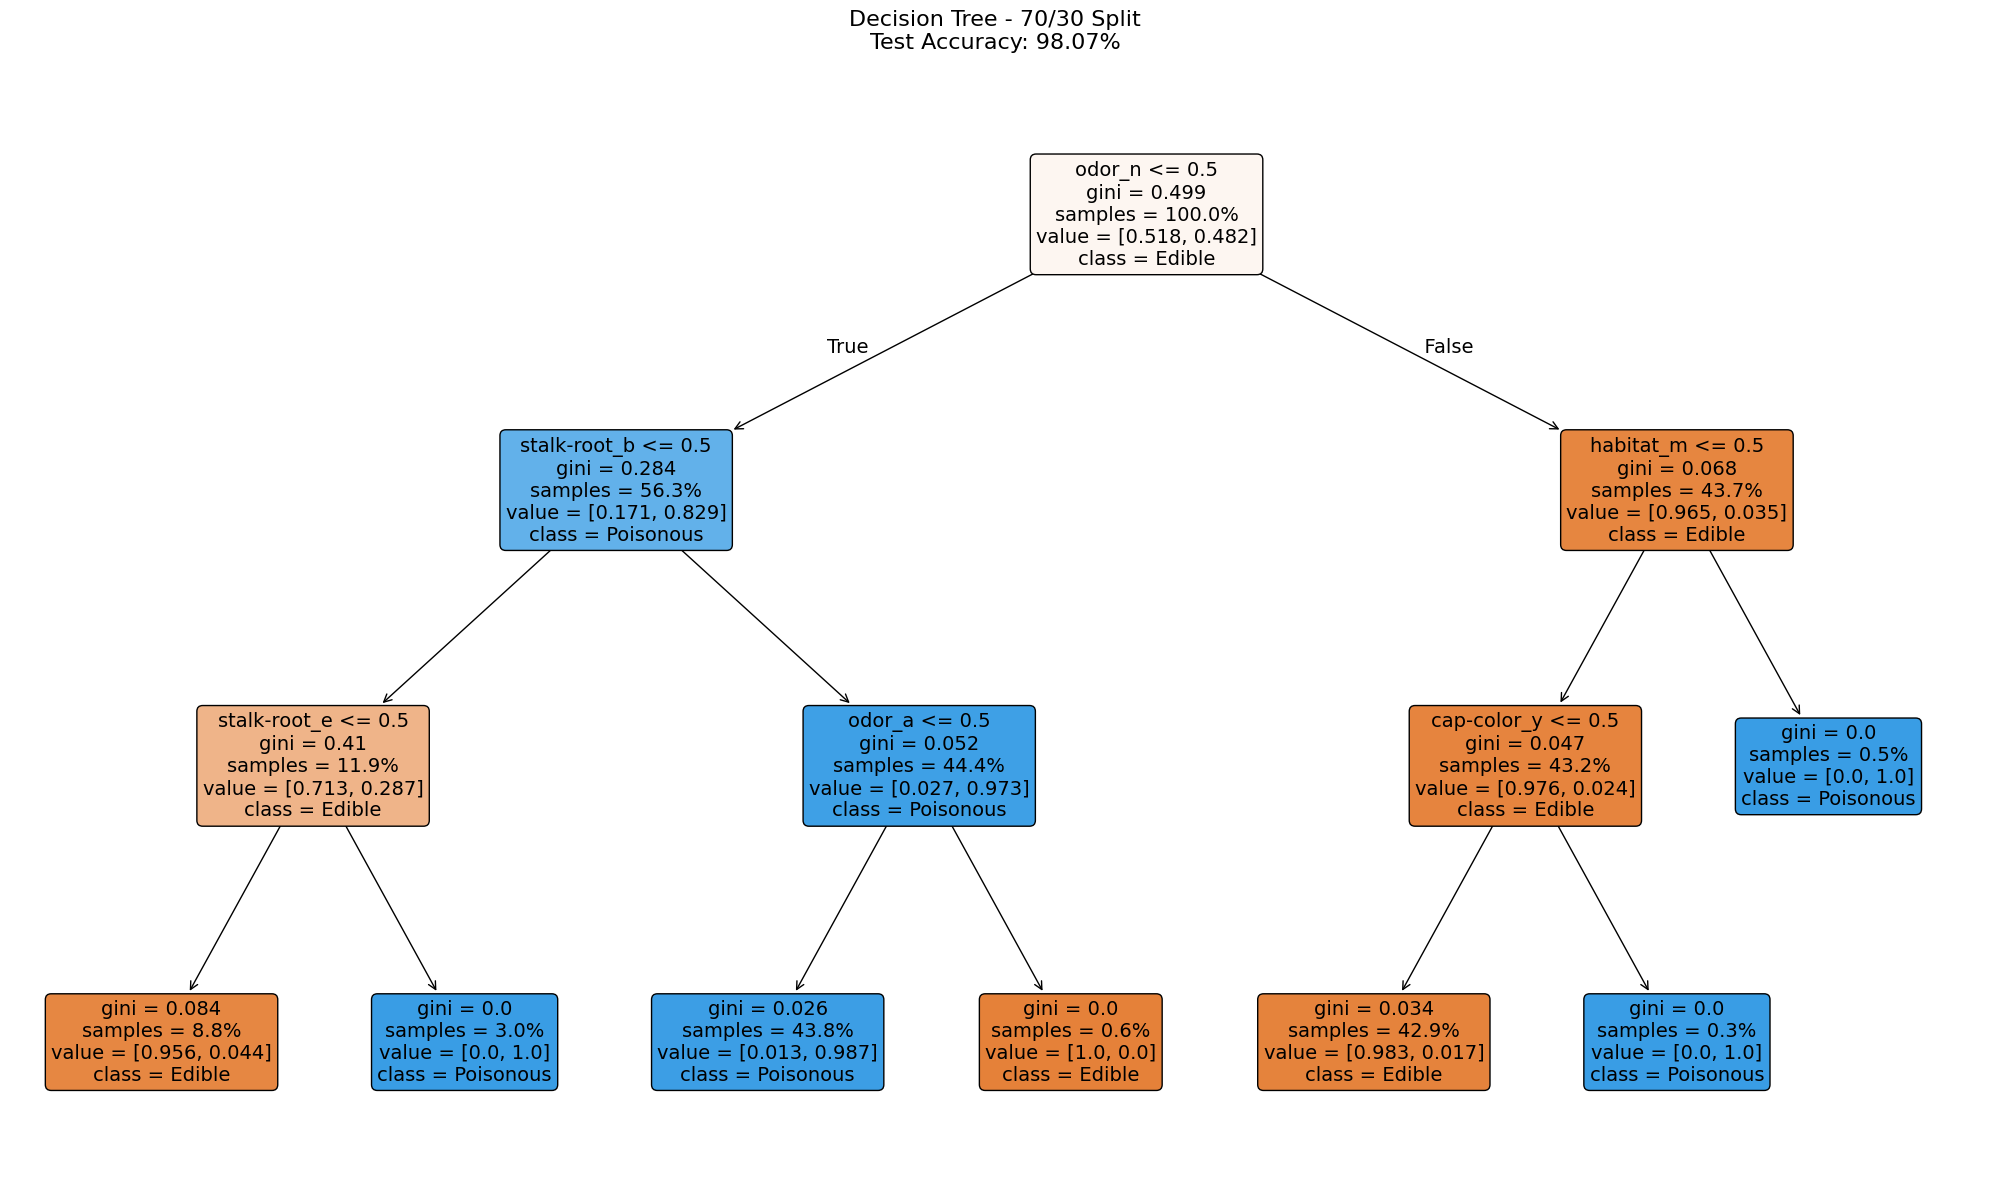


SPLIT: 80/20 (Test Size: 0.2)
Training set size: 6499
Test set size: 1625

=== DECISION TREE RESULTS ===
Test Accuracy: 97.97%
Confusion Matrix:
[[830  12]
 [ 21 762]]


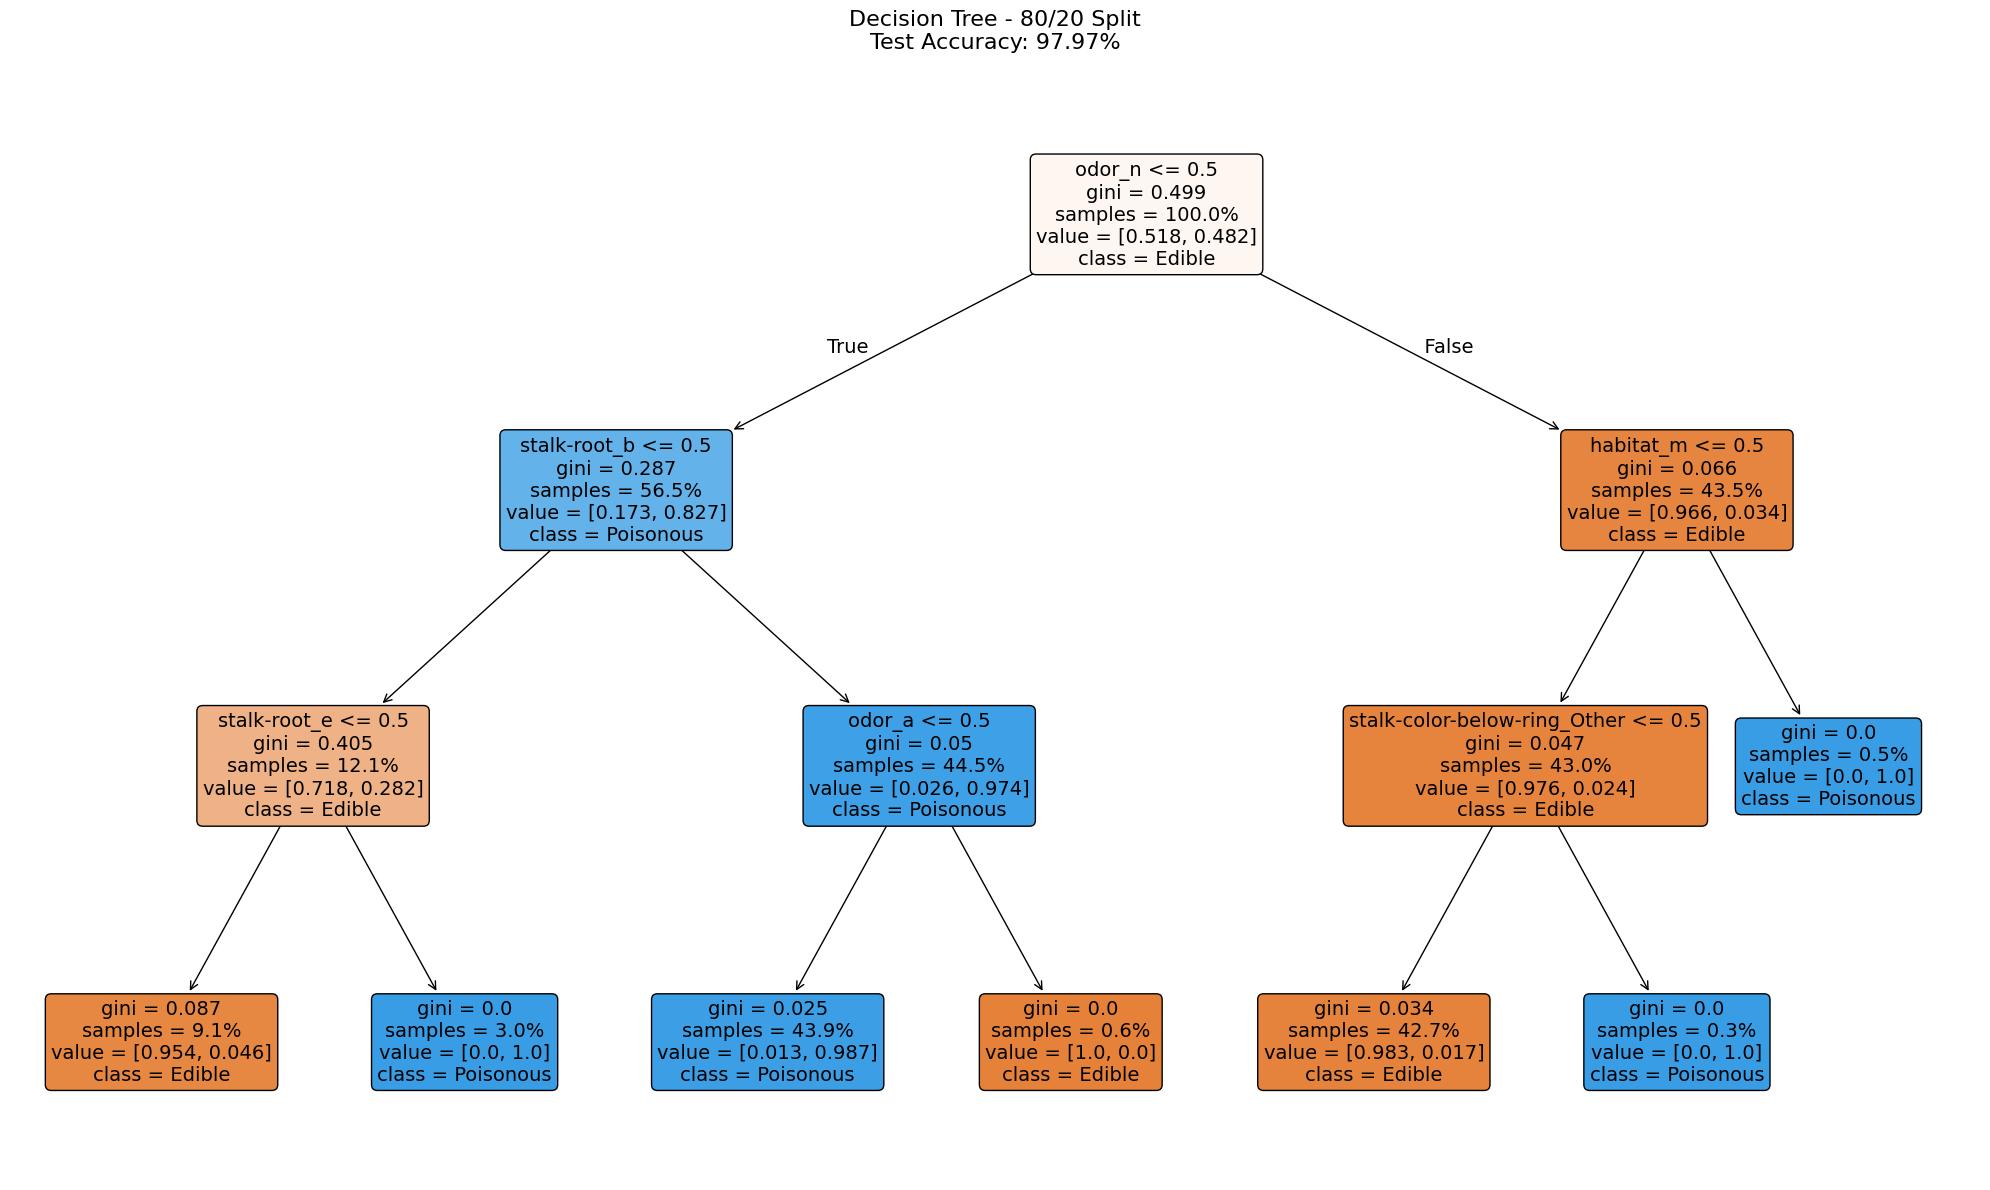

In [ ]:
# experimenting with different data split ratios
for i, test_size in enumerate(split_ratios):
    print(f"\n{'='*50}")
    print(f"SPLIT: {split_names[i]} (Test Size: {test_size})")
    print(f"{'='*50}")

    # splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y  # startification helps by maintaining class balance in splits
    )

    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")

    # Initializing the Decision Tree classifier (Gini)
    dt_model = DecisionTreeClassifier(
        criterion='gini',
        random_state=42,
        max_depth=3
    )


    # training the model & making predictions
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)


    # displaying model performance metrics
    test_accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print("\n=== DECISION TREE RESULTS ===")
    print(f"Test Accuracy: {test_accuracy:.2%}")
    print(f"Confusion Matrix:")
    print(cm)



    # visualizing the decision tree
    plt.figure(figsize=(20, 12))
    plot_tree(dt_model,
             filled=True,
             feature_names=X.columns,
             class_names=['Edible', 'Poisonous'],
             rounded=True,
             fontsize=14,
             proportion=True)

    plt.title(f'Decision Tree - {split_names[i]} Split\nTest Accuracy: {test_accuracy:.2%}',
              fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

### Confusion Matrix Visualization

We display three confusion matrices side-by-side, one for each data split we tested. Each box shows:

* How many mushrooms were correctly classified as edible or poisonous

* How many were misclassified

* The overall accuracy percentage

This visual comparison makes it easy to see which data split gives the best results and whether the model makes consistent mistakes across different training scenarios.

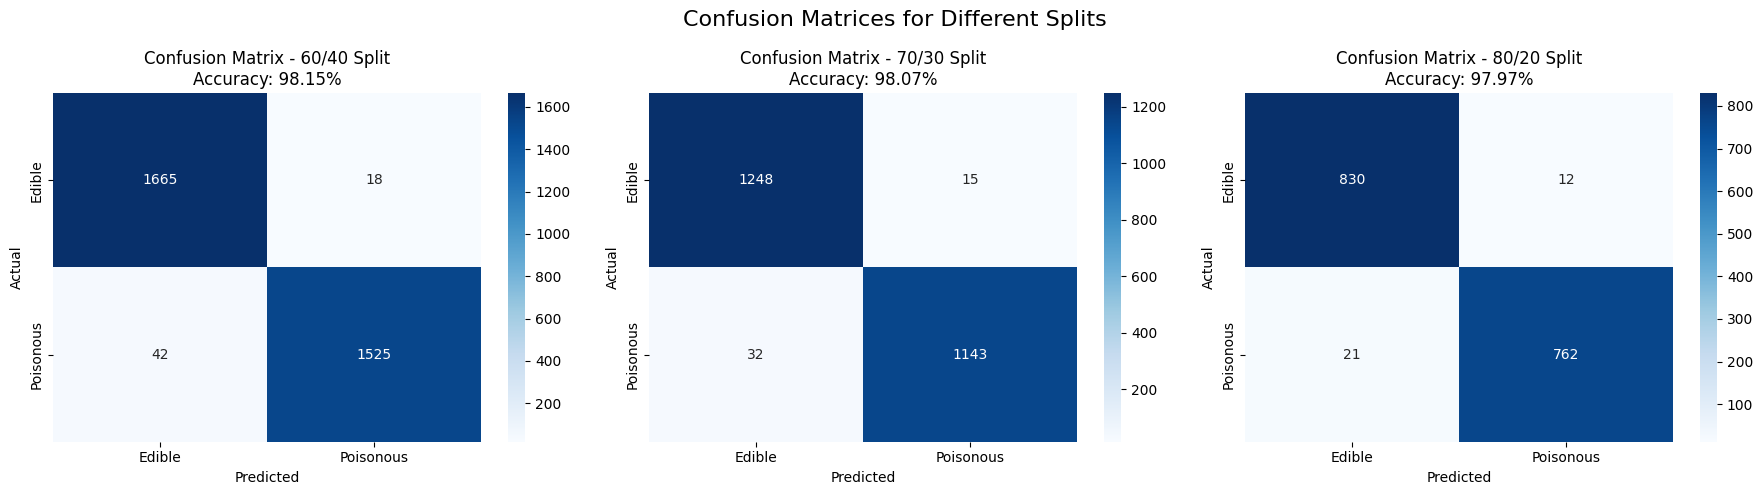

In [ ]:
fig_cm, axes_cm = plt.subplots(1, 3, figsize=(18, 5))
fig_cm.suptitle('Confusion Matrices for Different Splits', fontsize=16)

for i, result in enumerate(results):
    ax = axes_cm[i]
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
    ax.set_title(f'Confusion Matrix - {result["split"]} Split\nAccuracy: {result["test_accuracy"]:.2%}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()




### Summary of results

In conclusion, The model demonstrates consistently high performance (>97.9% accuracy) across all data splits, with a slight decrease in test accuracy as the size of the training set increases. This suggests the model is robust and not heavily dependent on the specific split ratio used in this experiment.

In [ ]:
print(f"\n{'='*80}")
print("SUMMARY OF RESULTS (Gini index)")
print(f"{'='*80}")
print(f"{'Split Ratio':<10} {'Train Size':<10} {'Test Size':<10}  {'Test Acc':<12}")
print(f"{'-'*80}")

for result in results:
    print(f"{result['split']:<10} {result['train_size']:<10} {result['test_size']:<10}    {result['test_accuracy']:.2%}")


SUMMARY OF RESULTS (Gini index)
Split Ratio Train Size Test Size   Test Acc    
--------------------------------------------------------------------------------
60/40      4874       3250          98.15%
70/30      5686       2438          98.07%
80/20      6499       1625          97.97%


## **b. Decision Tree (Entropy)**

# 2. **Clustering**

In [ ]:
!wget -O Preprocessed_dataset.csv "https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/main/Dataset/Preprocessed_dataset.csv"

import pandas as pd
df = pd.read_csv("Preprocessed_dataset.csv")
df.head(), df.shape


--2025-11-20 13:08:17--  https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/main/Dataset/Preprocessed_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1317333 (1.3M) [text/plain]
Saving to: ‘Preprocessed_dataset.csv’

Preprocessed_datase 100%[===================>]   1.26M  7.51MB/s    in 0.2s    

2025-11-20 13:08:18 (7.51 MB/s) - ‘Preprocessed_dataset.csv’ saved [1317333/1317333]



(   class  odor_n  odor_f  stalk-surface-above-ring_k  \
 0      1       0       0                           0   
 1      0       0       0                           0   
 2      0       0       0                           0   
 3      1       0       0                           0   
 4      0       1       0                           0   
 
    stalk-surface-below-ring_k  gill-color_b  ring-type_p  spore-print-color_n  \
 0                           0             0            1                    0   
 1                           0             0            1                    1   
 2                           0             0            1                    1   
 3                           0             0            1                    0   
 4                           0             0            0                    1   
 
    spore-print-color_k  gill-spacing_w  ...  cap-color_Other  cap-shape_Other  \
 0                    1               0  ...                0                0  

This code loads the preprocessed dataset and displays the first few rows to ensure it was imported correctly.

In [ ]:
# فصل عمود الكلاس عن باقي الأعمدة (الكلسترنق ما يستخدمه)
X_clust = df.drop('class', axis=1)

X_clust.shape


(8124, 80)

We removed the class label because clustering is an unsupervised task.
The variable X_clust now contains only the features used for K-means clustering.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = [2, 3, 4]
cluster_results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clust)

    sil = silhouette_score(X_clust, labels)
    wcss = kmeans.inertia_

    cluster_results.append({
        "K": k,
        "Silhouette": sil,
        "WCSS": wcss
    })

    print(f"K={k}, Silhouette={sil:.4f}, WCSS={wcss:.2f}")

K=2, Silhouette=0.1400, WCSS=56795.34
K=3, Silhouette=0.1568, WCSS=51007.55
K=4, Silhouette=0.1868, WCSS=45276.23


We applied K-means clustering with three different values of K (2, 3, and 4).
For each K, we calculated the Silhouette score and WCSS to evaluate cluster quality and separation.

In [ ]:
import pandas as pd

cluster_df = pd.DataFrame(cluster_results)
cluster_df

,K,Silhouette,WCSS
0,2,0.140017,56795.340659
1,3,0.156803,51007.546667
2,4,0.186792,45276.229345


This table summarizes the clustering results for each K value and allows easy comparison between Silhouette scores and WCSS.

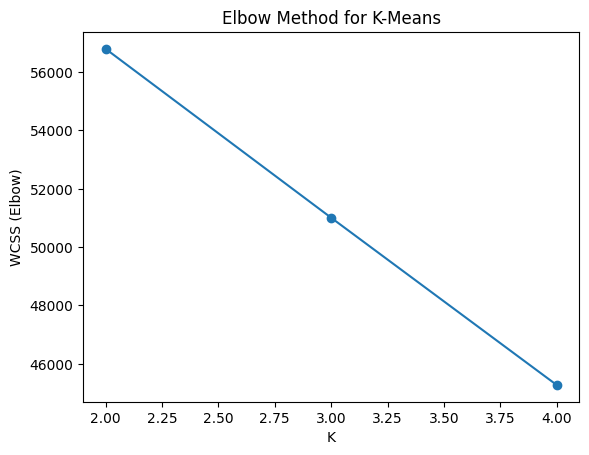

In [ ]:
import matplotlib.pyplot as plt

plt.plot(cluster_df["K"], cluster_df["WCSS"], marker='o')
plt.xlabel("K")
plt.ylabel("WCSS (Elbow)")
plt.title("Elbow Method for K-Means")
plt.show()


The Elbow plot visualizes how WCSS decreases as K increases.
In this dataset, the curve does not show a clear elbow point, so WCSS alone is not enough to choose the best K.

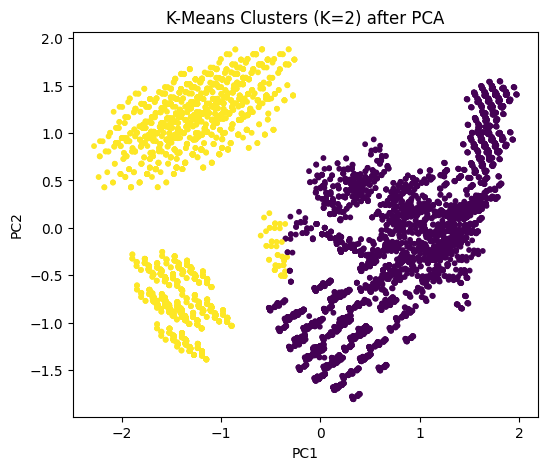

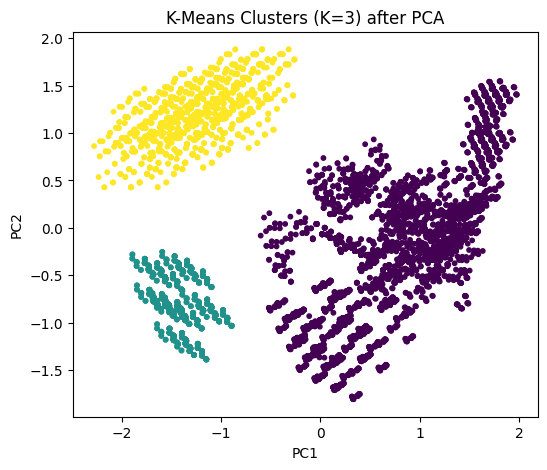

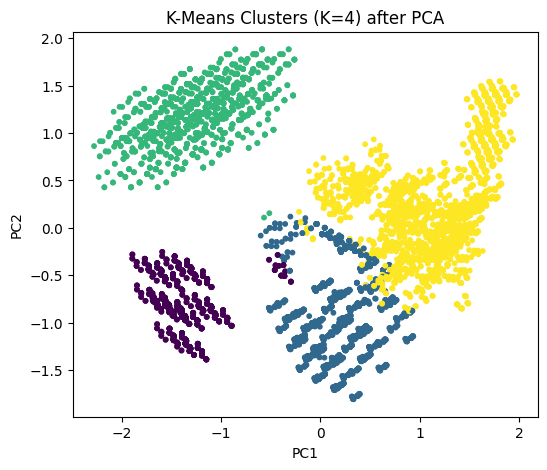

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# تقليل الأبعاد إلى 2D لرسم الكلسترز
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust)

# رسم الكلسترز لكل قيمة من K (2، 3، 4)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clust)

    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f"K-Means Clusters (K={k}) after PCA")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

PCA was used to reduce the dataset to two dimensions for visualization.
These plots show how the data points are grouped for each K value and help interpret the clustering structure.
